In [212]:
# Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score #evaluation


In [214]:
df=pd.read_csv('health_dataset.csv')
df

,Age,Glucose,BloodPressure,Insulin,BMI,PhysicalActivity,FamilyHistory,Outcome
0,60,139,93,229,19.6,Medium,No,0
1,27,128,60,18,22.7,Low,No,0
2,21,114,98,38,23.8,Low,Yes,1
3,67,161,80,207,38.5,High,No,0
4,37,168,91,232,37.4,Medium,No,0
...,...,...,...,...,...,...,...,...
95,30,99,88,17,29.8,Low,No,1
96,54,127,95,132,38.7,Low,No,1
97,66,177,66,174,20.5,Medium,No,1
98,35,100,63,159,39.3,High,Yes,1


In [216]:
# convert Categorial data into numbers
df['PhysicalActivity']=df['PhysicalActivity'].map({'low':0,'Medium':1,'High':2})
df['FamilyHistory']=df['FamilyHistory'].map({'No':0,'Yes':1})

In [218]:
x=df.drop(columns='Outcome') #feature of x
y=df['Outcome'] #target

In [220]:
#70% data for training & 30% data for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [220]:
#70% data for training & 30% data for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [222]:
#creating model and training
xyz=DecisionTreeClassifier(max_depth=3,random_state=42)
xyz.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [224]:
prediction=xyz.predict(x_test)

In [226]:
prediction

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [228]:
accuracy=accuracy_score(y_test,prediction)
precision=precision_score(y_test,prediction)
recall=recall_score(y_test,prediction)
f1=f1_score(y_test,prediction)

In [230]:
print("Accuracy is :",accuracy)
print("Precision is :",precision)
print("Recall is ;",recall)
print("f1_score is :",f1)

Accuracy is : 0.5
Precision is : 0.5
Recall is ; 0.6
f1_score is : 0.5454545454545454


In [232]:
# visualize the Tree

import matplotlib.pyplot as plt

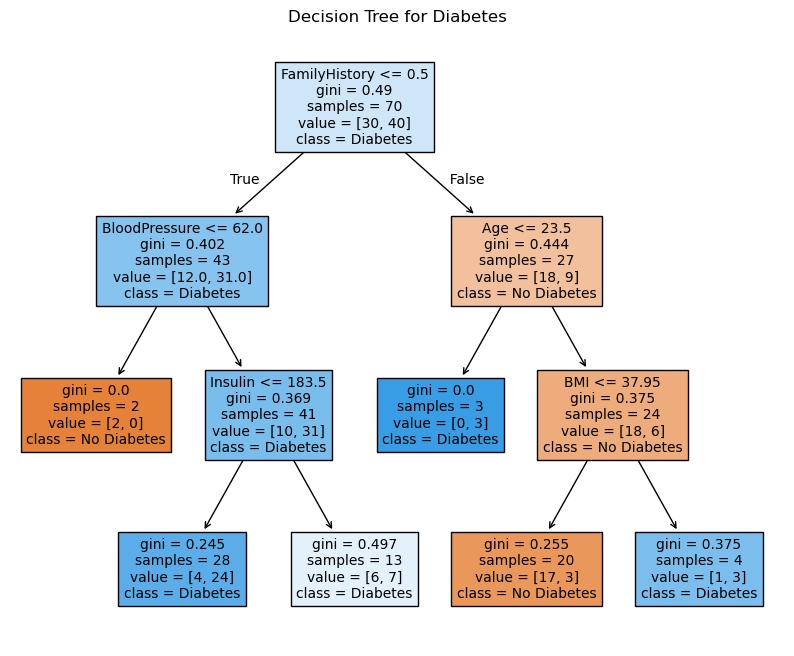

In [238]:
plt.figure(figsize=(10,8))
plot_tree(xyz,feature_names=x.columns,class_names=['No Diabetes','Diabetes'],filled=True)
plt.title("Decision Tree for Diabetes")
plt.show()